# *Libraries*

In [87]:
import sys
import keras
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam, AdamW, SGD
from keras.regularizers import Regularizer, l1, l2
from tensorflow.keras.layers import TextVectorization, Dense, Conv2D, Flatten, Dropout, Bidirectional, LSTM, Embedding
from tensorflow.keras.models import load_model, save_model, Sequential
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy

In [2]:
genderCsv = pd.read_csv('Genders.csv', usecols=[0,1])
genderCsv = genderCsv.sample(frac=0.5)
tokenizer = Tokenizer(char_level=True)

In [3]:
genderCsv

,Name,Gender
59231,Ramisha,F
86711,Oakie,M
33477,Bren,F
36386,Lailany,F
82250,Tehilah,F
...,...,...
74699,Quadaisha,F
44317,Marky,M
95884,Shloke,M
86895,Shauntel,M


In [4]:
names = genderCsv['Name']
names = names.astype(str).values
classes = genderCsv['Gender']

In [21]:
tokenizer.fit_on_texts(names)
sequences = tokenizer.texts_to_sequences(names)
vocab_size = len(tokenizer.word_index)+1

In [6]:
max_len = 20 
namesTokenized = pad_sequences(sequences, maxlen=max_len, padding='post')

In [7]:
classesEncoder = LabelEncoder()
classEncoded = classesEncoder.fit_transform(classes)

In [8]:
namesTokenized

array([[ 5,  1, 12, ...,  0,  0,  0],
       [ 9,  1, 14, ...,  0,  0,  0],
       [18,  5,  2, ...,  0,  0,  0],
       ...,
       [ 7,  8,  6, ...,  0,  0,  0],
       [ 7,  8,  1, ...,  0,  0,  0],
       [17,  1,  3, ...,  0,  0,  0]], dtype=int32)

In [9]:
print('Names after encoding:',namesTokenized)
print('Classes after encoding:',classEncoded)

Names after encoding: [[ 5  1 12 ...  0  0  0]
 [ 9  1 14 ...  0  0  0]
 [18  5  2 ...  0  0  0]
 ...
 [ 7  8  6 ...  0  0  0]
 [ 7  8  1 ...  0  0  0]
 [17  1  3 ...  0  0  0]]
Classes after encoding: [0 1 0 ... 1 1 1]


In [10]:
print('NamesShapae after encoding:',namesTokenized.shape)
print('Classes shape after encoding:',classEncoded.shape)

NamesShapae after encoding: (73634, 20)
Classes shape after encoding: (73634,)


In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(namesTokenized, classEncoded, test_size=0.2, random_state=42, stratify=classEncoded)

In [ ]:
# xtrain = xtrain.toarray()
# xtest = xtest.toarray()

41

In [92]:
model = Sequential([

    Embedding(input_dim=vocab_size, output_dim=48),

    Bidirectional(LSTM(128)),

    Dense(256,activation='relu') ,
    Dropout(0.1),
    
    Dense(128,activation='relu') ,
    Dropout(0.1),

    Dense(64,activation='relu') ,
    Dropout(0.1),

    Dense(32,activation='relu') ,

    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [95]:
history=model.fit(x=xtrain, y=ytrain,validation_data=(xtest,ytest), callbacks=[earlyStopping], epochs=10)

Epoch 1/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.6926 - loss: 0.5769 - val_accuracy: 0.7812 - val_loss: 0.4753
Epoch 2/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7791 - loss: 0.4754 - val_accuracy: 0.7843 - val_loss: 0.4784
Epoch 3/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7806 - loss: 0.4698 - val_accuracy: 0.7880 - val_loss: 0.4581
Epoch 4/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.7894 - loss: 0.4561 - val_accuracy: 0.7792 - val_loss: 0.4597
Epoch 5/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.7932 - loss: 0.4500 - val_accuracy: 0.7898 - val_loss: 0.4487
Epoch 6/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8017 - loss: 0.4298 - val_accuracy: 0.7974 - val_loss: 0.4409
Epoch 7/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8100 - loss: 0.4226 - val_accuracy: 0.8006 - val_loss: 0.4366
Epoch 8/10
1841/1841 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.8122 -

In [96]:
model.evaluate(xtest,ytest)

461/461 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8028 - loss: 0.4314


[0.431546688079834, 0.8044407963752747]

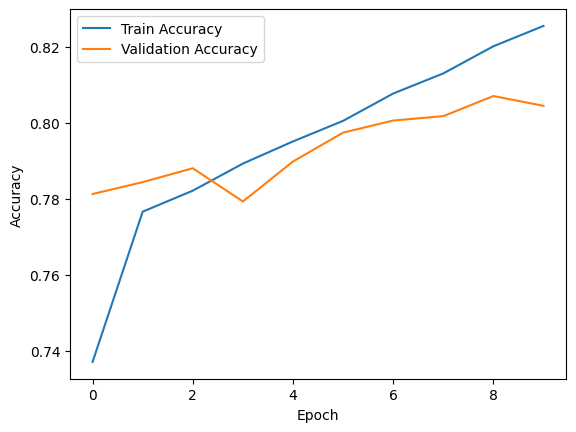

In [97]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [109]:
names = ["menna", "ahmed", "laila", "mohamed", "sara", "ramy", "fatma", "youssef"]

for input_name in names:
    input_seq = tokenizer.texts_to_sequences([input_name])
    input_padded = pad_sequences(input_seq, maxlen=20)
    
    pred_prob = model.predict(input_padded)[0][0]
    
    gender = "Woman" if pred_prob >= 0.5 else "Man"
    print(f"Name: {input_name}, Predicted Probability: {pred_prob:.4f}, Predicted Gender: {gender}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Name: menna, Predicted Probability: 0.7135, Predicted Gender: Woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Name: ahmed, Predicted Probability: 0.4614, Predicted Gender: Man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Name: laila, Predicted Probability: 0.8438, Predicted Gender: Woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Name: mohamed, Predicted Probability: 0.3056, Predicted Gender: Man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Name: sara, Predicted Probability: 0.8203, Predicted Gender: Woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Name: ramy, Predicted Probability: 0.0988, Predicted Gender: Man
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Name: fatma, Predicted Probability: 0.5362, Predicted Gender: Woman
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Name: youssef, Predicted Probability: 0.2968, Predicted Gender: Man
